### 1. Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import joblib

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score

import pycountry_convert as pyc
from imblearn.over_sampling import RandomOverSampler, SMOTE

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0)

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 2. Features meaning

In [2]:
var_desc = pd.read_csv('data/VariableDefinitions.csv',index_col='Column Name')

var_desc

,Definition
Column Name,
id,Unique identifier for each tourist
country,The country a tourist coming from.
age_group,The age group of a tourist.
travel_with,The relation of people a tourist travel with to Tanzania
total_female,Total number of females
total_male,Total number of males
purpose,The purpose of visiting Tanzania
main_activity,The main activity of tourism in Tanzania
infor_source,The source of information about tourism in Tanzania


### 3. Data analysis

In [3]:
tanz_df = pd.read_csv('data/Train.csv', index_col='Tour_ID')

# I drop duplicates, just in case
tanz_df.drop_duplicates(inplace=True)

# I also import the test_data
test_df = pd.read_csv('data/Test.csv', index_col='Tour_ID')

tanz_df.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
Tour_ID,,,,,,,,,,,,,,,,,,,,
tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,0,No,Lower Cost
tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [4]:
tanz_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17626 entries, tour_id1hffseyw to tour_idceoq9por
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                17626 non-null  object 
 1   age_group              17626 non-null  object 
 2   travel_with            16581 non-null  object 
 3   total_female           17624 non-null  float64
 4   total_male             17620 non-null  float64
 5   purpose                17626 non-null  object 
 6   main_activity          17626 non-null  object 
 7   info_source            17626 non-null  object 
 8   tour_arrangement       17626 non-null  object 
 9   package_transport_int  17626 non-null  object 
 10  package_accomodation   17626 non-null  object 
 11  package_food           17626 non-null  object 
 12  package_transport_tz   17626 non-null  object 
 13  package_sightseeing    17626 non-null  object 
 14  package_guided_tour    17626 non-nu

There are some **null** cells in **travel_with**, **total_female**, **total_male**. Since the missing data in total_female and total_male represents just an infinitesimal part both of the tanz_df and test sets, I drop the rows where these two columns are null.

In [5]:
tanz_df.dropna(subset=['total_female', 'total_male'], inplace=True)
test_df.dropna(subset=['total_female', 'total_male'], inplace=True)

Looking at the charts below I mostly notice that the various **packages seem to impact on the travel cost**, helping to discriminate cost categories. As the tour cost increase, more people in the specific cost categories purchase the packages. Also, in the higher cost categories most of the travelers are visiting Tanzania for the first time, while for lower cost classes the contrary happens. So I think that also **first_trip_tz** is an important feature.

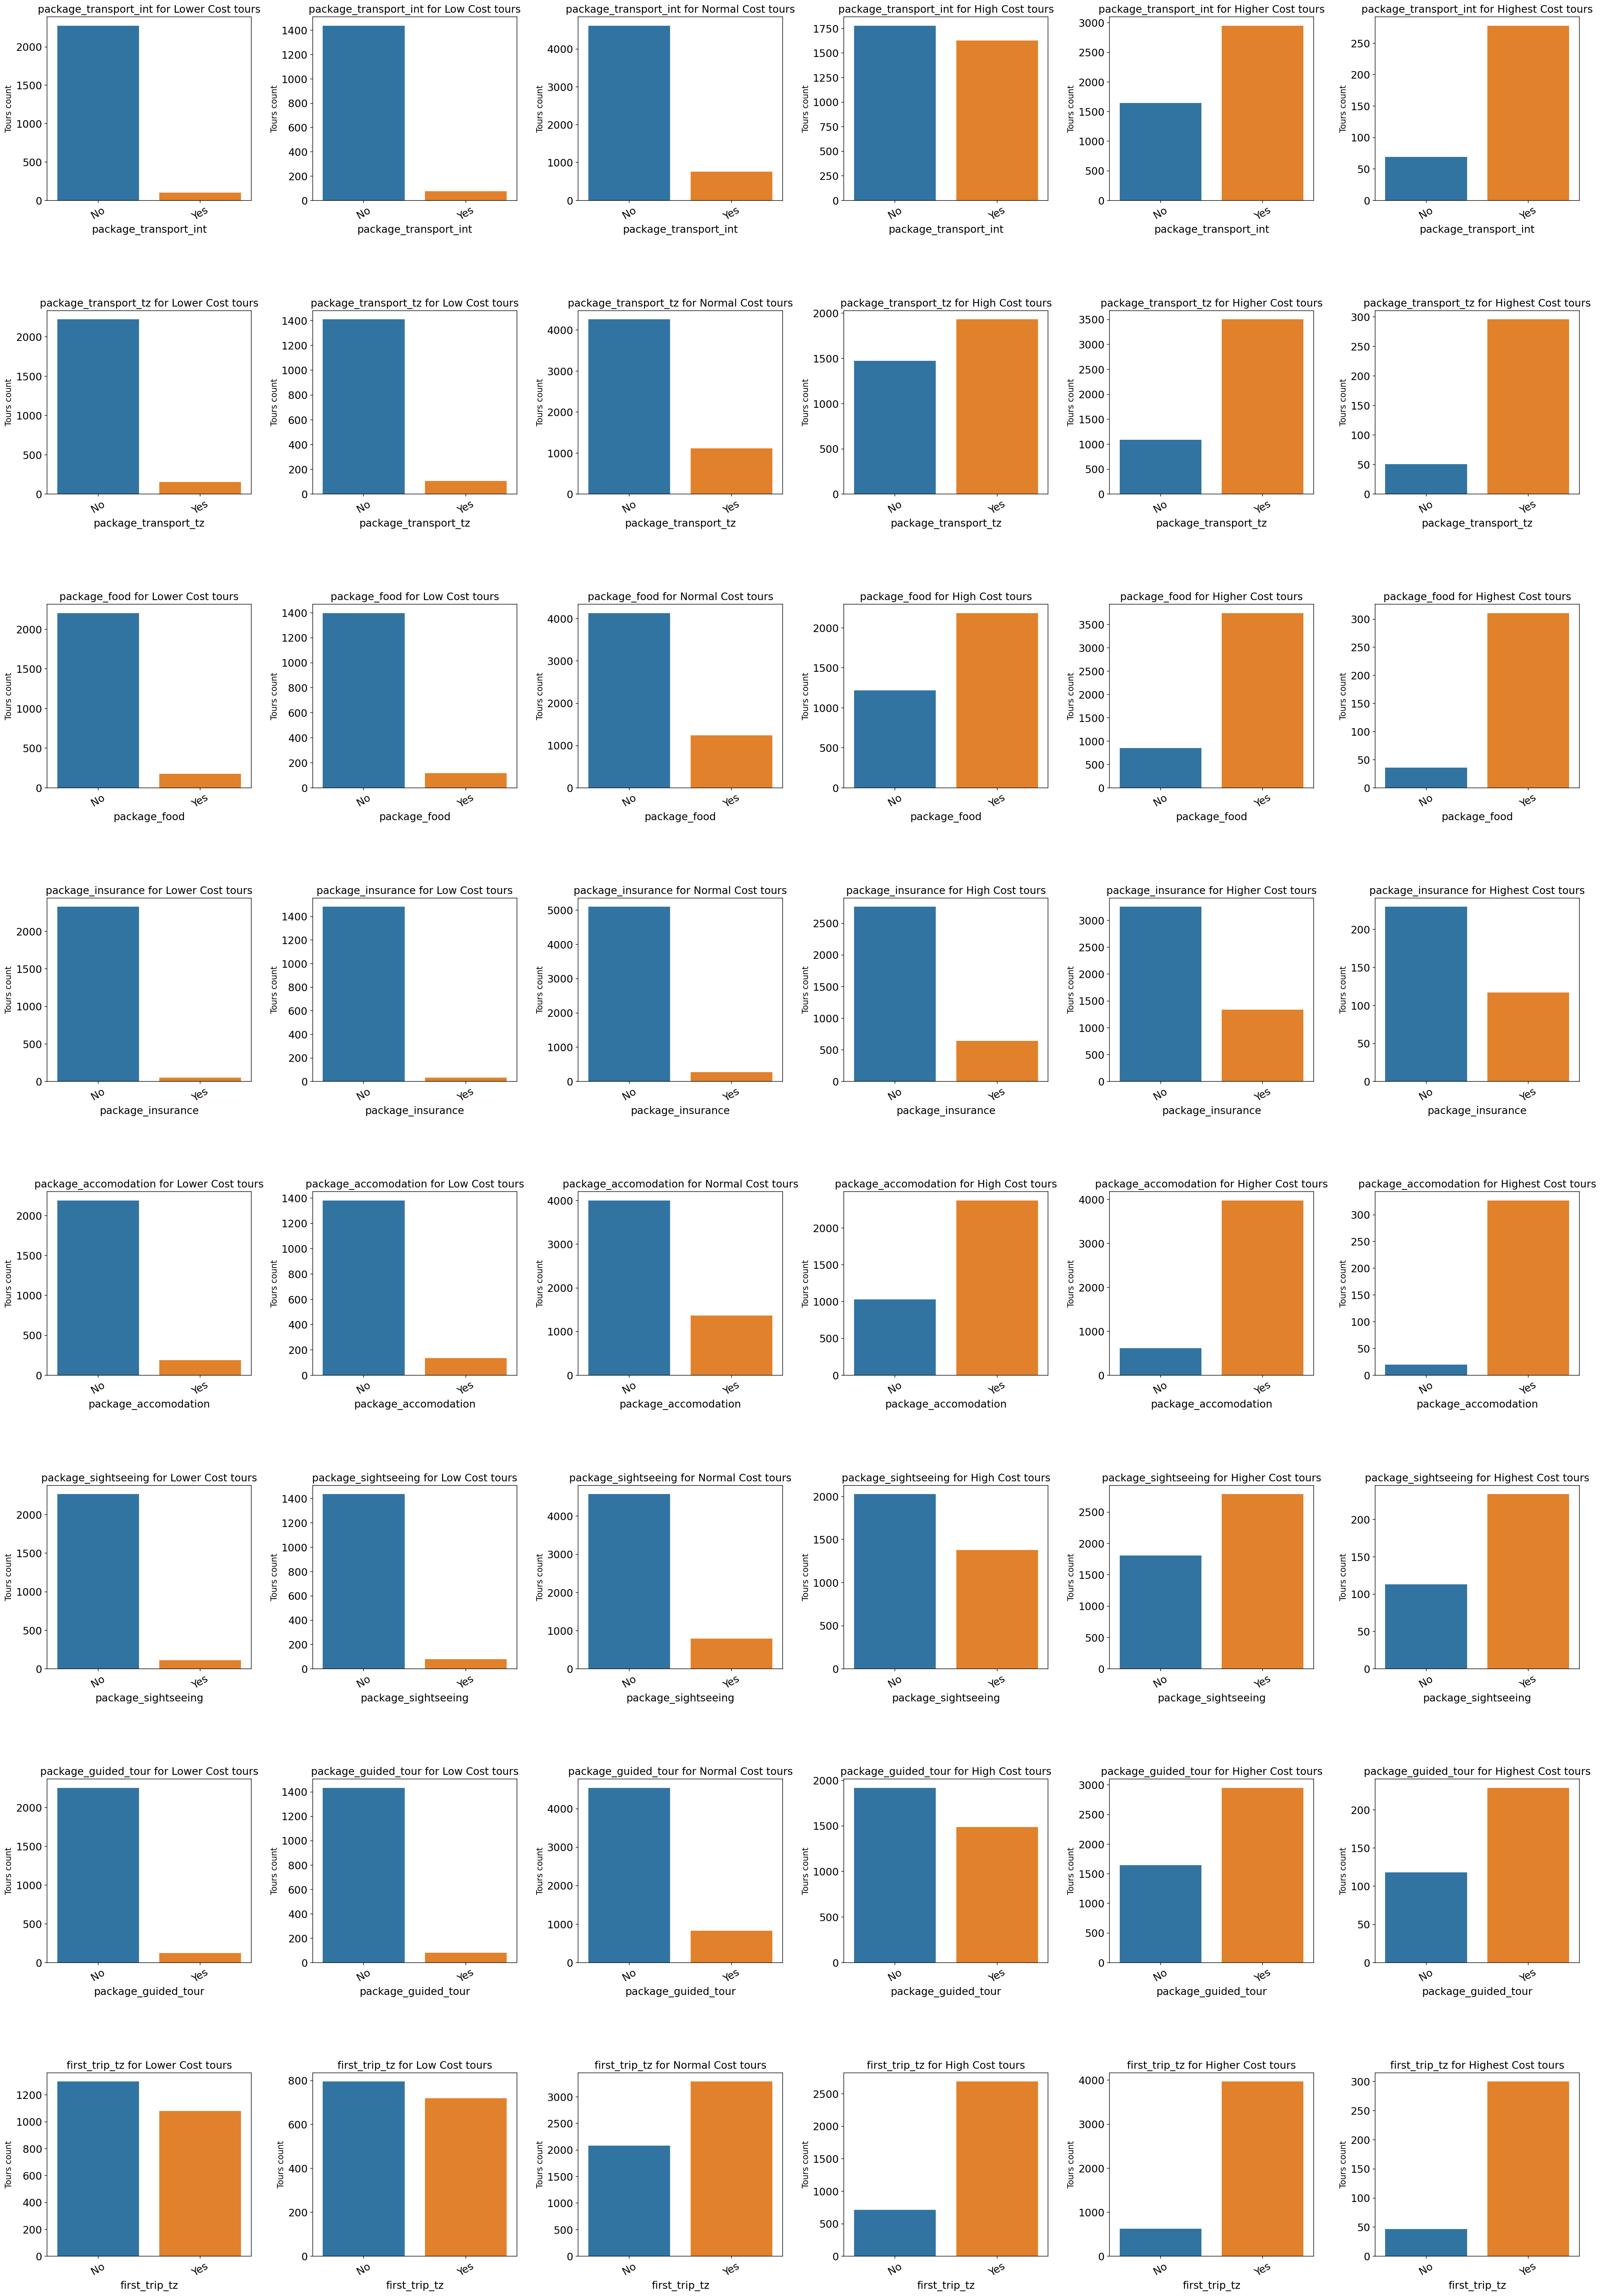

In [6]:
fig, ax = plt.subplots(8,6, figsize=(40,60))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

i=-1
for col in ['package_transport_int','package_transport_tz', 'package_food','package_insurance','package_accomodation',
           'package_sightseeing','package_guided_tour', 'first_trip_tz']:
    j = 0
    i += 1
    
    for cst in ['Lower Cost','Low Cost','Normal Cost','High Cost','Higher Cost','Highest Cost']:
        sns.countplot(x=tanz_df[tanz_df['cost_category'] == cst][col], ax=ax[i,j], order=['No','Yes'])
        ax[i,j].set_title(label=f'{col} for {cst} tours',fontsize=15)
        ax[i,j].tick_params(axis='both', labelsize=15)
        ax[i,j].tick_params(axis='x', labelrotation=30)
        ax[i,j].set_ylabel(ylabel='Tours count', fontsize=12)
        ax[i,j].set_xlabel(xlabel=f'{col}', fontsize=15)
        
        j += 1
        


Looking at the unique values in tanz_df for the country column I see some **"duplicates"**: UNITED ARAB EMIRATES - UAE, BURGARIA - BULGARIA. I will try and "unify" the same countries, with a lambda function.

In [7]:
tanz_df['country'].unique()

array(['ITALY', 'UNITED KINGDOM', 'UNITED STATES OF AMERICA', 'RWANDA',
       'FRANCE', 'SWIZERLAND', 'NIGERIA', 'AUSTRALIA', 'SPAIN', 'DENMARK',
       'BELGIUM', 'ZAMBIA', 'NETHERLANDS', 'CANADA', 'INDIA', 'NORWAY',
       'ZIMBABWE', 'MORROCO', 'CHINA', 'GERMANY', 'SOUTH AFRICA', 'JAPAN',
       'UAE', 'RUSSIA', 'KENYA', 'GREECE', 'POLAND', 'AUSTRIA',
       'MALAYSIA', 'CZECH REPUBLIC', 'KOREA', 'DRC', 'CYPRUS', 'KUWAIT',
       'BRAZIL', 'CHILE', 'BULGARIA', 'UNITED ARAB EMIRATES', 'ISRAEL',
       'NEW ZEALAND', 'UGANDA', 'IRELAND', 'SWEDEN', 'QATAR', 'CONGO',
       'BURUNDI', 'FINLAND', 'GHANA', 'OMAN', 'LEBANON', 'LUXEMBOURG',
       'IVORY COAST', 'NAMIBIA', 'ROMANIA', 'THAILAND', 'SUDAN',
       'SINGAPORE', 'PORTUGAL', 'MALAWI', 'MALT', 'EGYPT', 'PAKISTAN',
       'TANZANIA', 'ARGENTINA', 'SRI LANKA', 'BOTSWANA', 'VIETNAM',
       'BERMUDA', 'TAIWAN', 'SENEGAL', 'AFGHANISTAN', 'COLOMBIA',
       'JAMAICA', 'BAHRAIN', 'COSTARICA', 'COMORO', 'URUGUAY',
       'SAUD ARABIA', 

In [8]:
tanz_df['country'] = tanz_df['country'].apply(lambda x: 'BULGARIA' if x=='BURGARIA' else 'UAE' if x=='UNITED ARAB EMIRATES' else x)
test_df['country'] = test_df['country'].apply(lambda x: 'BULGARIA' if x=='BURGARIA' else 'UAE' if x=='UNITED ARAB EMIRATES' else x)

In [9]:
tanz_df['age_group'] = tanz_df['age_group'].apply(lambda x: 'below 18' if x=='<18' else x)
test_df['age_group'] = test_df['age_group'].apply(lambda x: 'below 18' if x=='<18' else x)

In [10]:
tanz_df['travel_with'].value_counts(normalize=True)

Alone                           0.437673
With Spouse                     0.264450
With Other Friends/Relatives    0.194401
With Spouse and Children        0.071075
With Children                   0.032400
Name: travel_with, dtype: float64

In [11]:
tanz_df['main_activity']=tanz_df['main_activity'].apply(lambda x: 'Wildlife Tourism' if x=='Widlife Tourism' else x)
test_df['main_activity']=test_df['main_activity'].apply(lambda x: 'Wildlife Tourism' if x=='Widlife Tourism' else x)

**travel_with**

Despite the majority of tours being made up of singles or couples, their share changes based on the Cost class: the majority of travelers of the Lower to Normal cost class are Alone travelers, while usually the High to Highest cost classes involve a relevant share of people traveling with their Spouse, With Spouse+Children, and with Friends and Relatives. 


**purpose**

Also the purpose of the travel impact costs: In the Lower and Low cost classes we see many travelers who are going to Tanzania not only for leisure but also for business and for visiting relatives and friends. Normal to Highest cost classes are made up of people traveling mainly for Leisure and Holidays.


**main_activity**

As per the main activity, Hunting seems one of the main choices for the lowest cost categories, while Wildlife Tourism (corrected with a lambda function) is one of the main choices in most of the cost classes.


**info_source**

The main source of information for lower to normal cost classes is word of mouth from Friends/relatives, while especially for the highest cost classes the main source of information is Travel agent/tour operator.


**tour arrangement**

Most of the tours in the lower to normal cost classes are Independently organized, while in the high to highest classes the tours are mostly Package tours.

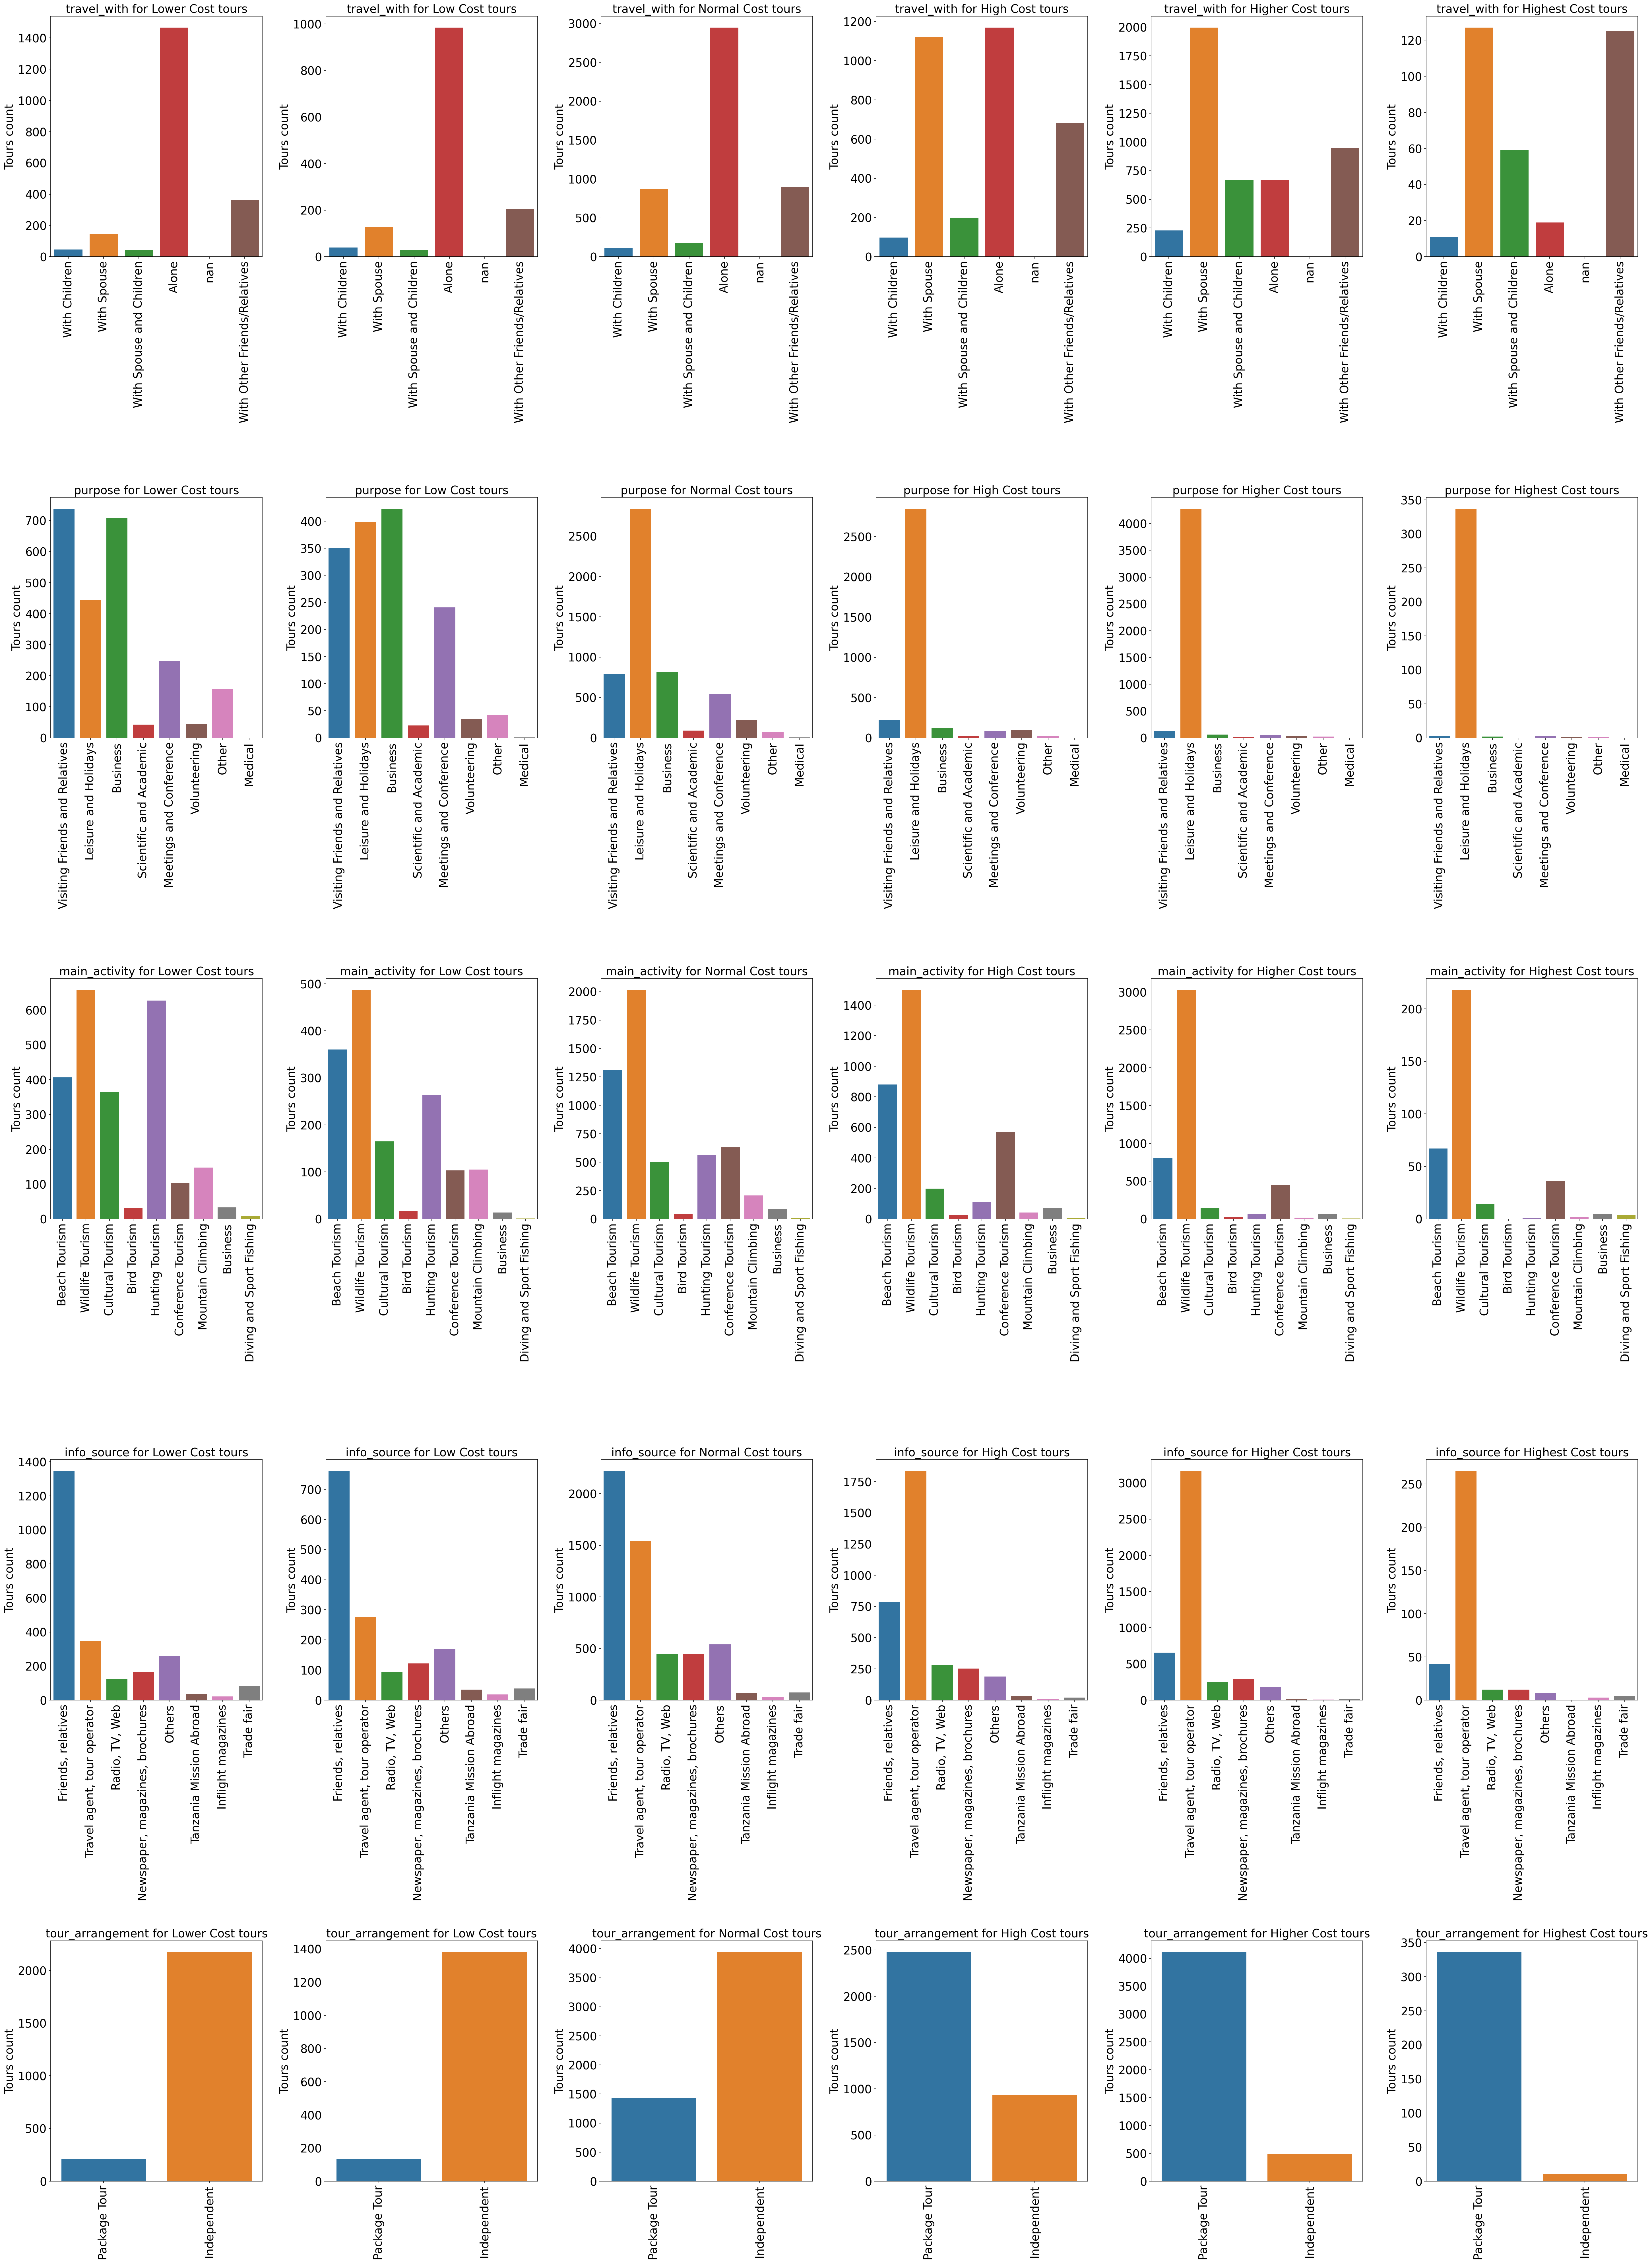

In [12]:
fig, ax = plt.subplots(5,6, figsize=(50,70))
plt.subplots_adjust(hspace=1, wspace=0.3)

i=-1
for col in ['travel_with','purpose', 'main_activity','info_source','tour_arrangement']:
    j = 0
    i += 1
    
    for cst in ['Lower Cost','Low Cost','Normal Cost','High Cost','Higher Cost','Highest Cost']:
        sns.countplot(x=tanz_df[tanz_df['cost_category'] == cst][col], ax=ax[i,j], order=tanz_df[col].unique())
        ax[i,j].set_title(label=f'{col} for {cst} tours',fontsize=20)
        ax[i,j].tick_params(axis='both', labelsize=20)
        ax[i,j].tick_params(axis='x', labelrotation=90, labelsize=20)
        ax[i,j].set_ylabel(ylabel='Tours count', fontsize=20)
        ax[i,j].set_xlabel(xlabel='')
        
        j += 1
        

**People within different age groups choose different traveling options**. 
As travelers get older they choose more expensive trips.

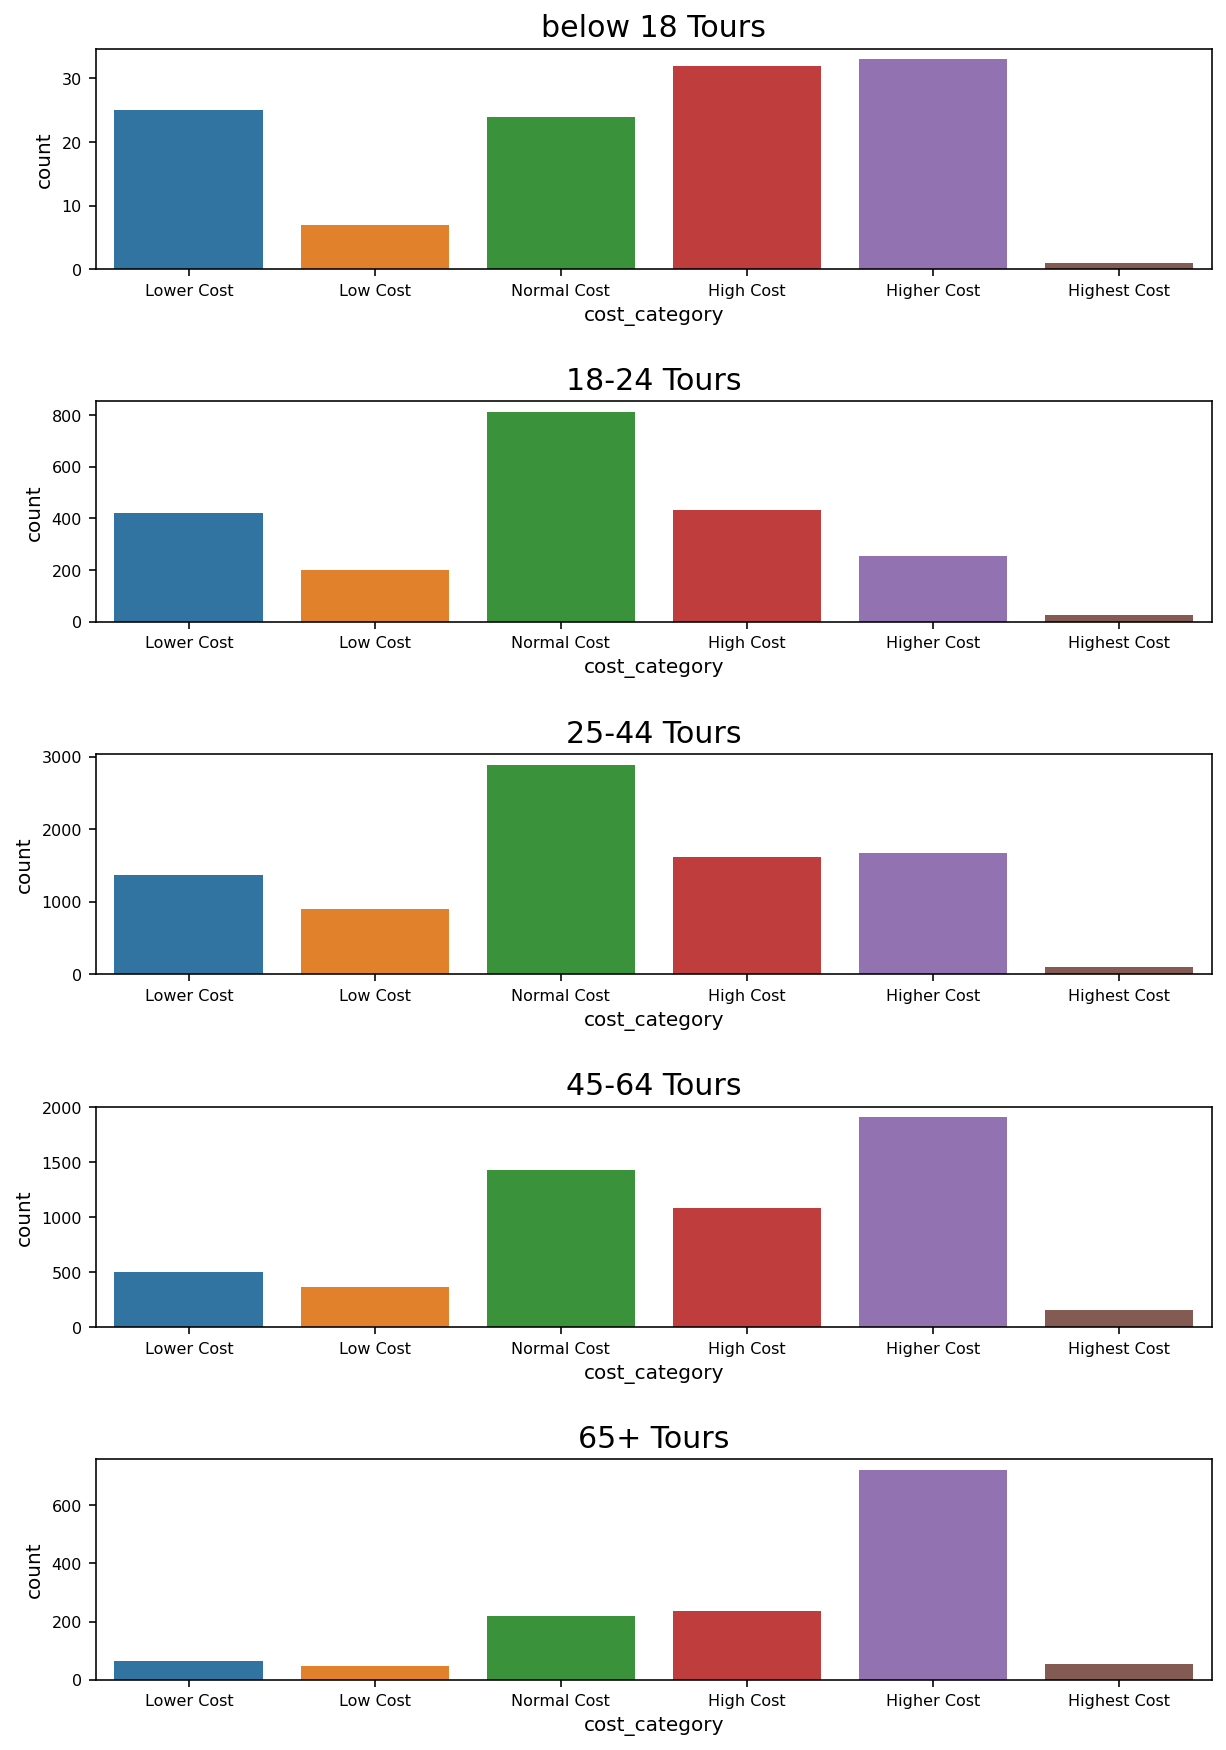

In [13]:
fig, ax = plt.subplots(5,1, figsize=(10,15))

cost = ['Lower Cost','Low Cost','Normal Cost','High Cost','Higher Cost','Highest Cost']
plt.subplots_adjust(hspace=0.6)
i=0
for age in ['below 18', '18-24', '25-44', '45-64','65+']:
        sns.countplot(x=tanz_df[tanz_df['age_group'] == age]['cost_category'], ax=ax[i], order=cost)
        ax[i].set_title(label=f'{age} Tours',fontsize=15)
        ax[i].tick_params(labelsize=8)
        i += 1
        


Looking at the distributions in the pairplot chart I notice that **outliers are present within the numeric columns**, there are some extreme values. 

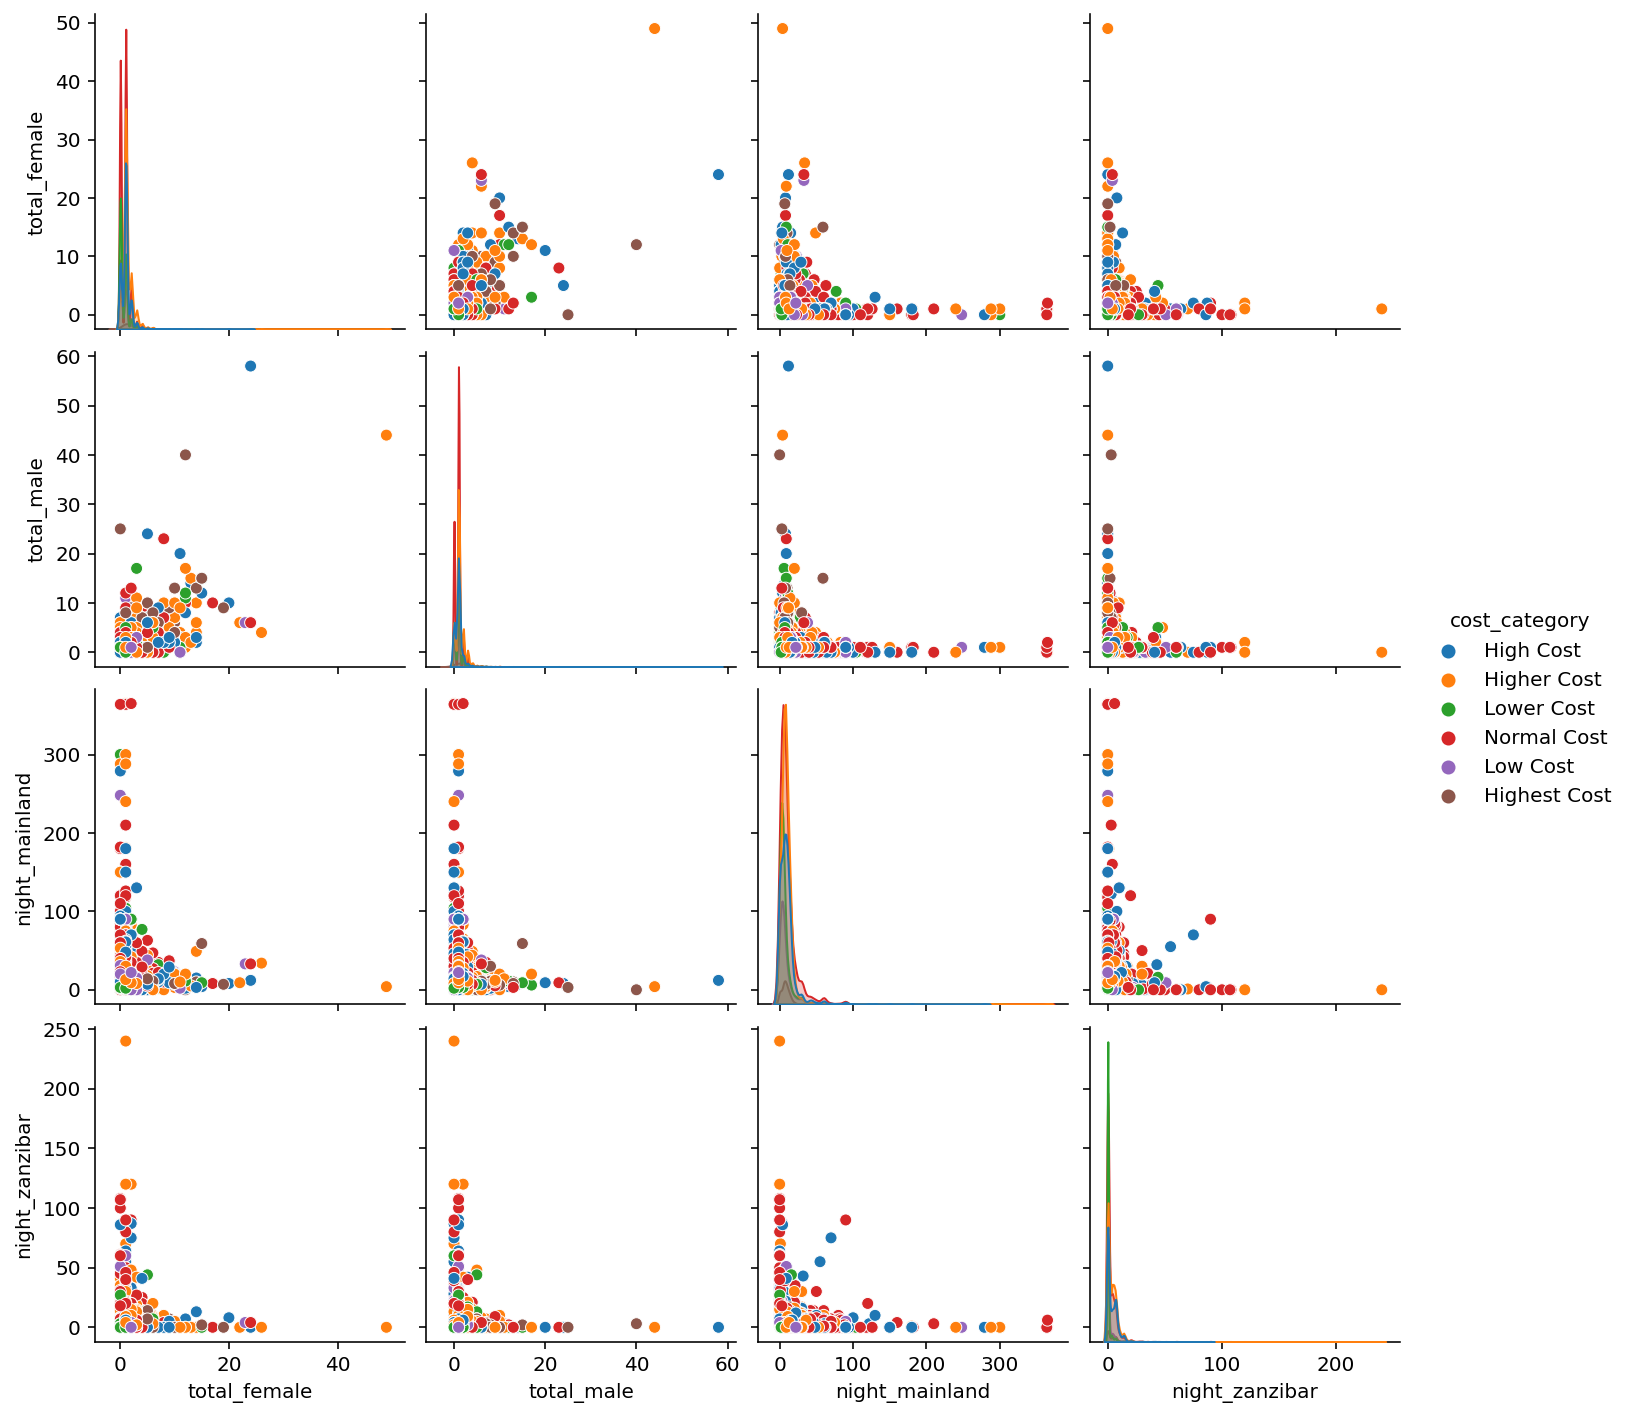

In [14]:
sns.pairplot(tanz_df, diag_kind='kde', hue='cost_category')

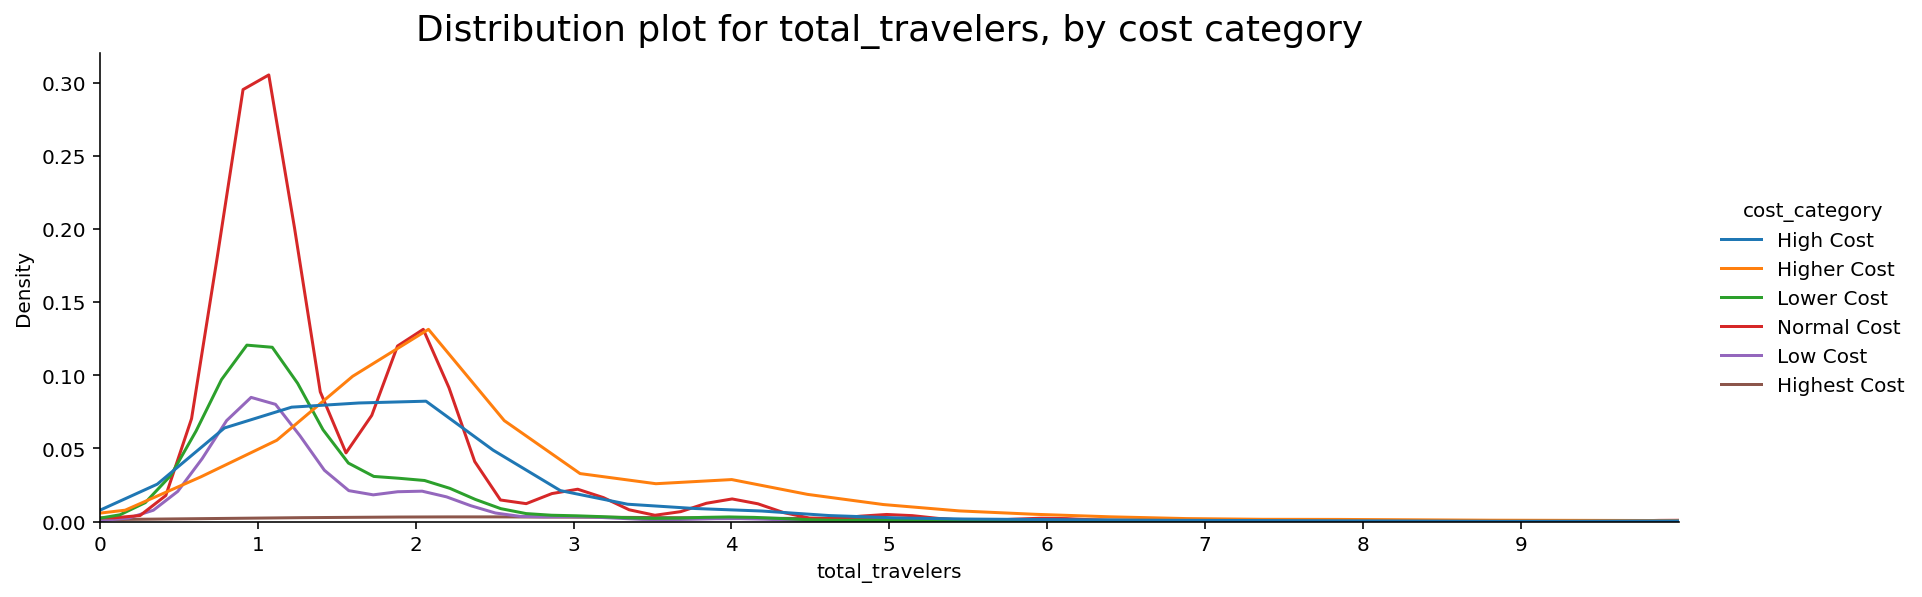

In [15]:
tanz_df['total_travelers'] = tanz_df['total_female'] + tanz_df['total_male']

sns.displot(data= tanz_df, x='total_travelers', hue='cost_category',
            kind='kde',
            aspect=3, height=4)
plt.xlim(0, 10)
plt.xticks(np.arange(10))
plt.title(label='Distribution plot for total_travelers, by cost category', fontsize=18);


Lower to Normal Cost tours have mainly single travelers, Higher Cost tours have an high density of couples.

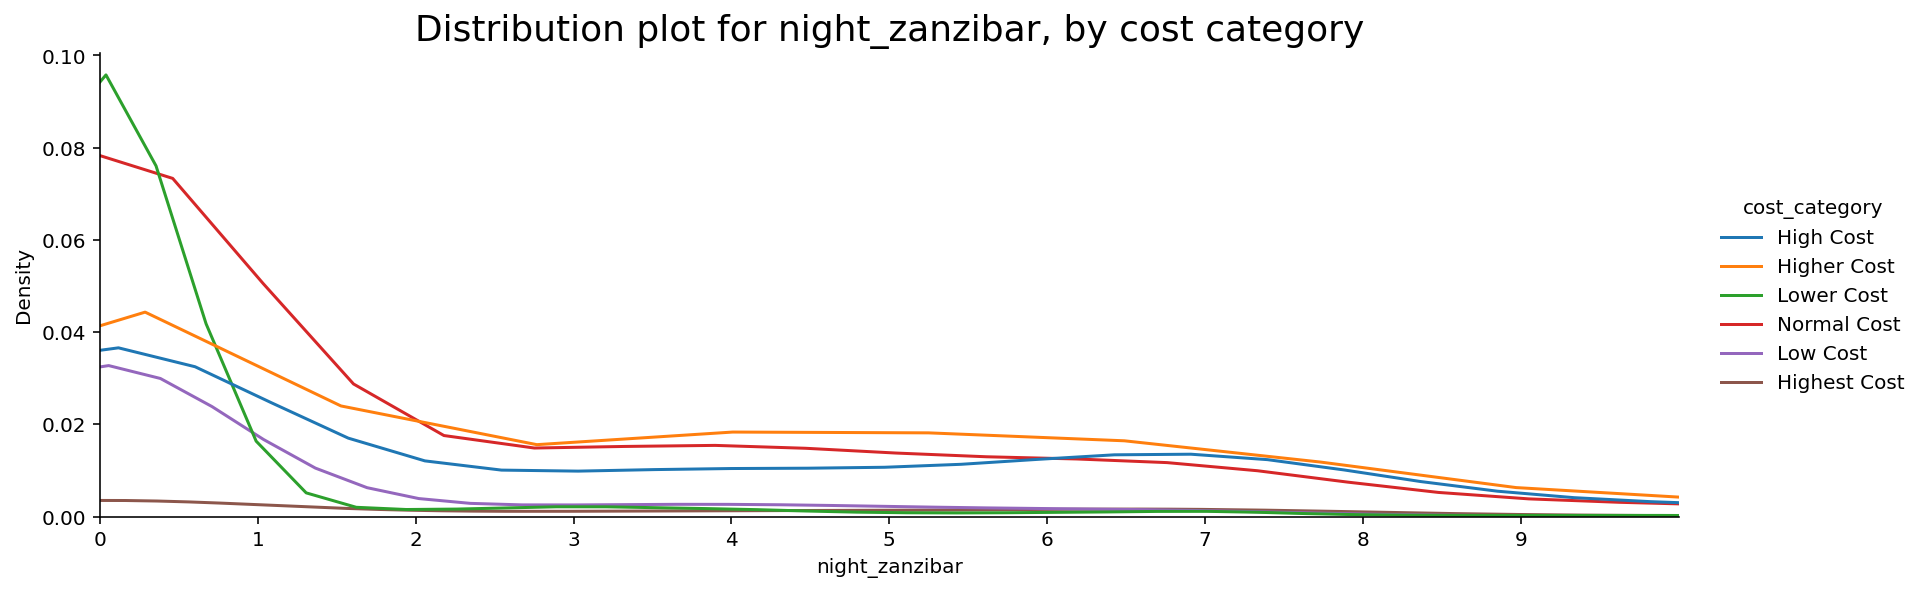

In [16]:
sns.displot(data= tanz_df, x='night_zanzibar', hue='cost_category',
            kind='kde',
            aspect=3, height=4)
plt.xlim(0, 10)
plt.xticks(np.arange(10))
plt.title(label='Distribution plot for night_zanzibar, by cost category', fontsize=18);

Lower to Normal Cost tours have the highest density around 0 to 1 nights in Zanzibar, while for High to Highest Cost tours the distribution is a little flatter.

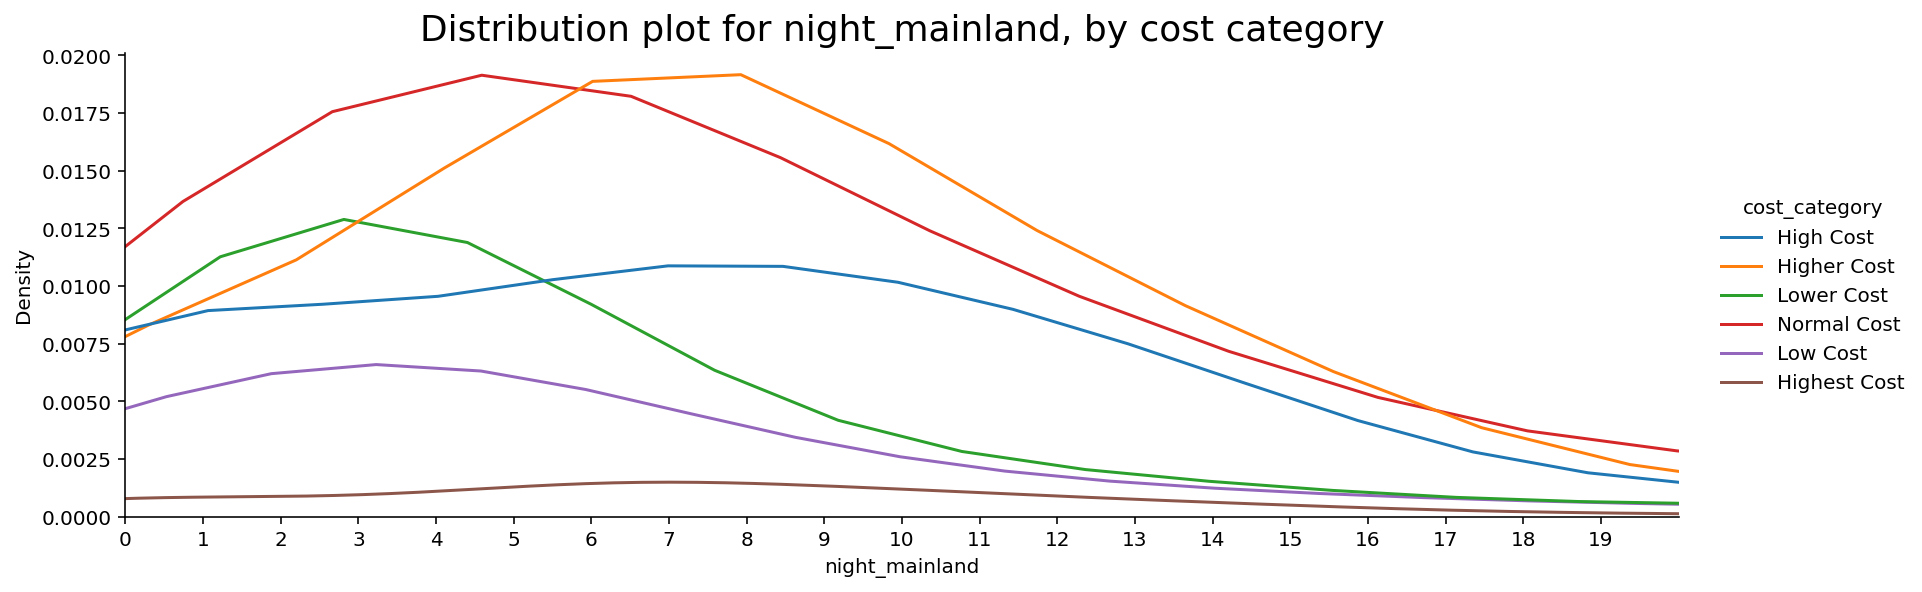

In [17]:
sns.displot(data= tanz_df, x='night_mainland', hue='cost_category',
            kind='kde',
            aspect=3, height=4)
plt.xlim(0, 20)
plt.xticks(np.arange(20))
plt.title(label='Distribution plot for night_mainland, by cost category', fontsize=18);

Lower to Normal Cost tours have the highest density around 3 to 5 nights in mainland, while for Higher Cost torus the highest density is around 7-8 nights. The Highest Cost tours density distribution for night mainland is more flat.

I see that there is a high correlation between total_travelers vs total_male and total_female. I decide to keep total_female and total_male, discarding total_travelers. I do this because I think that genders could have some impact on the cost category.

In [18]:
tanz_df.corr()

,total_female,total_male,night_mainland,night_zanzibar,total_travelers
total_female,1.000000,0.420106,0.002658,0.098720,0.847634
total_male,0.420106,1.000000,-0.038813,0.015918,0.837586
night_mainland,0.002658,-0.038813,1.000000,-0.093800,-0.021093
night_zanzibar,0.098720,0.015918,-0.093800,1.000000,0.068737
total_travelers,0.847634,0.837586,-0.021093,0.068737,1.000000


In [19]:
tanz_df.drop(['total_travelers'], axis = 1, inplace=True)

I start separating training (90% of rows) and validation data (10% of rows). The cost_category column in the training set has lots of Normal Cost but just a few Highest Cost, and this lack of balance will negatively influence my model ability to generalize. Therefore, after separating X and y I will run RandomOverSampler to equilibrate label classes.

In [20]:
X = tanz_df.drop(['cost_category'], axis=1)
y = pd.DataFrame(data=tanz_df['cost_category'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=25)

In [21]:
y_train.value_counts()

cost_category
Normal Cost      4836
Higher Cost      4136
High Cost        3065
Lower Cost       2142
Low Cost         1365
Highest Cost      312
dtype: int64

The percentage of missing data for "travel_with" is 6% of X_train.

I will need to fill in the missing data, looking at the amount travelers in those cases.

In [22]:
X_train['travel_with'].isna().sum()/len(X_train)

0.060166498486377396

I want to see the amount of travelers when travel_with is null. I see that **97% of cases** are people traveling alone, therefore I will use "Alone" as a filler value. 

In [23]:
X_train['total_travelers'] = X_train['total_female'] + X_train['total_male']

In [24]:
X_train[X_train['travel_with'].isna()==True]['total_travelers'].value_counts(normalize=True)

1.0     0.971698
2.0     0.011530
4.0     0.005241
3.0     0.003145
11.0    0.002096
0.0     0.002096
9.0     0.001048
6.0     0.001048
5.0     0.001048
7.0     0.001048
Name: total_travelers, dtype: float64

In [25]:
# I drop the columns that I used for my checks and that I don't need anymore 
X_train.drop('total_travelers', axis = 1, inplace=True)

Many columns in the training set have non numerical data, and the numerical columns I see have different means and standard deviations. I will need to encode non numerical columns and then rescale the data. 
I will use RobustScaler(), especially because there are outliers in the numerical columns. The new numerical values will be calculated in the following way: new value = (value – median) / (p75 – p25)

In [26]:
X_train.describe(include='all')

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
count,15856,15856,14902,15856.000000,15856.000000,15856,15856,15856,15856,15856,15856,15856,15856,15856,15856,15856,15856.000000,15856.000000,15856
unique,128,5,5,NaN,NaN,8,9,8,2,2,2,2,2,2,2,2,NaN,NaN,2
top,UNITED STATES OF AMERICA,25-44,Alone,NaN,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Independent,No,No,No,No,No,No,No,NaN,NaN,Yes
freq,2368,7694,6508,NaN,NaN,10051,7133,6696,8015,10637,8304,8855,9438,10988,10708,13617,NaN,NaN,10845
mean,NaN,NaN,NaN,0.943239,1.001451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.363332,2.503847,NaN
std,NaN,NaN,NaN,1.234757,1.219751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.470060,5.370544,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,0.000000,NaN
75%,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,4.000000,NaN


In [27]:
over_sampler = RandomOverSampler(random_state=25)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

Here I apply OrdinalEncoder to the labels of the training and validation sets

In [28]:
ordinal_cat = [['Lower Cost','Low Cost','Normal Cost','High Cost','Higher Cost','Highest Cost']]

ordenc = OrdinalEncoder(categories=ordinal_cat, dtype='int')

y_train_proc = ordenc.fit_transform(y_train_over)
y_valid_proc = ordenc.transform(y_valid)

I create a pipeline for data preprocessing.
I basically impute and encode values for traveling_with, then I encode all other categorical columns.
Then I use RobustScaler for numeric columns.

In [29]:
numeric_cols = ['total_female','total_male','night_mainland','night_zanzibar']
inputer_cols = ['travel_with']
categoric_cols = X_train.drop(['total_female','total_male','night_mainland','night_zanzibar','travel_with'], axis=1).columns


inputer_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy='constant', fill_value='Alone')),
        ("ohencode", OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore', dtype='int'))
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("ohencode", OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore', dtype='int'))
    ]
)
numeric_pipeline = Pipeline(
    steps=[("scale", RobustScaler())]
)

ct = ColumnTransformer(transformers=[
    ('inputer_pipe', inputer_pipeline, inputer_cols),
    ('categ_pipe', categorical_pipeline, categoric_cols),
    ('num_pipe', numeric_pipeline, numeric_cols)])

pipe = Pipeline(steps=[
    ('coltr', ct)
])


pipe.fit(X_train_over, y_train_proc)


X_train_proc = pd.DataFrame(data=pipe.fit_transform(X_train_over))

X_valid_proc = pd.DataFrame(data=pipe.transform(X_valid))

X_test = pd.DataFrame(data=pipe.transform(test_df))

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Looking at the warnings above I see that some values of the field "country" that are present in the validation and test sets are missing from the training set. At first I thought about adding columns with the names of the missing countries in all the sets, filling them with ones in the corresponding couples index-country, but I also thought that even passing a column of zeros with the name of a country to the training test would have led to data leakage, because in that way I would suggest to the training set a feature present in the validation/test set. 

I try to use different baseline models to do a first prediction, comparing the f1 scores on validation and training sets. There is obviously high variance for all of these models (a smaller one for the XGBoost model), but the best predicting models at the moment are RandomForestClassifier and XGBoostClassifier. So I try working on these two, to reduce variance and improve the f1 score for the validation set. 

In [30]:
model_lst = [
    ('knn_5_eucl', KNeighborsClassifier(n_neighbors=5,metric='euclidean')),
    ('dtreeCl', DecisionTreeClassifier(random_state=25)),
    ('baggCl', BaggingClassifier(n_jobs = -1, random_state=25)),
    ('randfCl', RandomForestClassifier(n_jobs = -1, random_state=25)),
    ('xgbstCl',  xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',use_label_encoder=False, n_jobs=-1, random_state=25))]


perf_df = pd.DataFrame(columns = ['f1_train', 'f1_valid'])


for (name, mdl) in model_lst:

    mdl.fit(X_train_proc, y_train_proc.squeeze())
    f1_train = round(f1_score(y_train_proc, mdl.predict(X_train_proc), average='weighted'),2)
    f1_valid = round(f1_score(y_valid_proc, mdl.predict(X_valid_proc), average='weighted'),2)
    
    
    perf_df.loc[name, 'f1_train']= f1_train
    perf_df.loc[name, 'f1_valid']= f1_valid

perf_df    

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,f1_train,f1_valid
knn_5_eucl,0.77,0.44
dtreeCl,0.98,0.44
baggCl,0.97,0.46
randfCl,0.98,0.52
xgbstCl,0.74,0.54


I see that XGBoostClassifier is the model with the highest f1 score, and the lowest variance, so I try to improve this model, also trying to lower variance.

In [31]:
%%time

# With the best parameters below XGBoost still overfits and lowers the f1 score for the test set.

prm_grid = {
    "max_depth": [3, 4, 5],
    "min_child_weight": [5, 6,7],
    "gamma": [0.6, 0.7],
    "subsample" : [0.3, 0.4, 0.5]
} 

clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                        use_label_encoder=False, n_jobs=-1, random_state=25)

grdcv = GridSearchCV(estimator=clf, param_grid=prm_grid, n_jobs=-1, cv=3, scoring = 'f1_weighted')

grdcv.fit(X_train_proc, y_train_proc.squeeze()).best_params_

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: total: 3min 24s
Wall time: 35min 3s


{'gamma': 0.6, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.5}

In [32]:
print('Classification report for an XGBClassifier model - TEST SET')
print(classification_report(y_valid_proc, grdcv.best_estimator_.predict(X_valid_proc)))
print('\n')
print('Classification report for an XGBClassifier model - TRAIN SET')
print(classification_report(y_train_proc, grdcv.best_estimator_.predict(X_train_proc)))

Classification report for an XGBClassifier model - TEST SET
              precision    recall  f1-score   support

           0       0.55      0.61      0.57       238
           1       0.21      0.32      0.26       151
           2       0.61      0.45      0.52       537
           3       0.45      0.47      0.46       341
           4       0.68      0.62      0.65       460
           5       0.14      0.43      0.21        35

    accuracy                           0.51      1762
   macro avg       0.44      0.48      0.44      1762
weighted avg       0.55      0.51      0.52      1762



Classification report for an XGBClassifier model - TRAIN SET
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4836
           1       0.66      0.66      0.66      4836
           2       0.58      0.53      0.55      4836
           3       0.63      0.61      0.62      4836
           4       0.68      0.70      0.69      4836
         

In [34]:
%%time

# I try to improve the Xgboost model with GridsearchCV

prm_grid = {
    "max_depth": [3, 4],
    "min_child_weight": [7],
    "gamma": [0.6, 0.7],
    "subsample" : [0.3, 0.4]
} 

clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                        use_label_encoder=False, n_jobs=-1, random_state=25)

grdcv = GridSearchCV(estimator=clf, param_grid=prm_grid, n_jobs=-1, cv=3, scoring = 'f1_weighted')

grdcv.fit(X_train_proc, y_train_proc.squeeze()).best_params_

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: total: 2min 38s
Wall time: 4min 20s


{'gamma': 0.7, 'max_depth': 4, 'min_child_weight': 7, 'subsample': 0.4}

In [35]:
print('Classification report for an XGBClassifier model - TEST SET')
print(classification_report(y_valid_proc, grdcv.best_estimator_.predict(X_valid_proc)))
print('\n')
print('Classification report for an XGBClassifier model - TRAIN SET')
print(classification_report(y_train_proc, grdcv.best_estimator_.predict(X_train_proc)))

Classification report for an XGBClassifier model - TEST SET
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       238
           1       0.19      0.31      0.24       151
           2       0.63      0.45      0.52       537
           3       0.46      0.48      0.47       341
           4       0.71      0.62      0.66       460
           5       0.15      0.51      0.23        35

    accuracy                           0.51      1762
   macro avg       0.45      0.49      0.45      1762
weighted avg       0.56      0.51      0.52      1762



Classification report for an XGBClassifier model - TRAIN SET
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      4836
           1       0.60      0.59      0.60      4836
           2       0.52      0.48      0.50      4836
           3       0.57      0.54      0.56      4836
           4       0.63      0.64      0.63      4836
         

### 4. Model choice
After many tests I choose this as my model. I did not manage to improve the f1 weighted score on the validation set (0.54), but I was able to reduce variance (f1 weighted for the test set is now 0.60) by limiting the max_depth of trees and increasing the minimum weight required for leaves. I limited the samples of rows used by each tree (subsample) as well as the features used for each tree (colsample_bytree). Finally I applied gamma and alpha as penalizations. 

In [54]:
%%time

prm_grid = {
    "max_depth": [4],
    "min_child_weight": [7],
    "gamma": [2],
    "subsample" : [0.5],
    "colsample_bytree" : [0.7],
    "alpha" : [4]    
} 

clf = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                        use_label_encoder=False, n_jobs=-1, random_state=25)

grdcv = GridSearchCV(estimator=clf, param_grid=prm_grid, n_jobs=-1, cv=3, scoring = 'f1_weighted')

grdcv.fit(X_train_proc, y_train_proc.squeeze()).best_params_

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: total: 1min 57s
Wall time: 40.8 s


{'alpha': 4,
 'colsample_bytree': 0.7,
 'gamma': 2,
 'max_depth': 4,
 'min_child_weight': 7,
 'subsample': 0.5}

In [55]:
print('Classification report for an XGBClassifier model - TEST SET')
print(classification_report(y_valid_proc, grdcv.best_estimator_.predict(X_valid_proc)))
print('\n')
print('Classification report for an XGBClassifier model - TRAIN SET')
print(classification_report(y_train_proc, grdcv.best_estimator_.predict(X_train_proc)))

Classification report for an XGBClassifier model - TEST SET
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       238
           1       0.21      0.34      0.26       151
           2       0.64      0.45      0.53       537
           3       0.49      0.53      0.51       341
           4       0.72      0.60      0.65       460
           5       0.15      0.57      0.23        35

    accuracy                           0.52      1762
   macro avg       0.46      0.51      0.46      1762
weighted avg       0.58      0.52      0.54      1762



Classification report for an XGBClassifier model - TRAIN SET
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      4836
           1       0.54      0.52      0.53      4836
           2       0.46      0.44      0.45      4836
           3       0.53      0.51      0.52      4836
           4       0.60      0.61      0.61      4836
         

In [56]:
clf_final = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss',
                                use_label_encoder=False, n_jobs=-1, random_state=25,
                               alpha= 4, colsample_bytree= 0.7, gamma= 2, max_depth= 4, 
                               min_child_weight= 7, subsample= 0.5)

clf_final.fit(X_train_proc, y_train_proc.squeeze())

y_preds = pd.DataFrame(clf_final.predict(X_test),
                       columns=['num_class'],
                       index=test_df.index)
y_preds

c:\Users\dell\Documents\ml_projects\master\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,num_class
Test_ID,
tour_idynufedne,2
tour_id9r3y5moe,4
tour_idf6itml6g,3
tour_id99u4znru,1
tour_idj4i9urbx,0
...,...
tour_id2deyfjhq,1
tour_idlenv2rio,0
tour_id7wwqrs0p,3


In [57]:
y_preds = pd.DataFrame(data = ordenc.inverse_transform(y_preds),
                       columns = ['PredictedClass'],
                       index = y_preds.index)

y_preds.index.name='Test_ID'

y_preds

,PredictedClass
Test_ID,
tour_idynufedne,Normal Cost
tour_id9r3y5moe,Higher Cost
tour_idf6itml6g,High Cost
tour_id99u4znru,Low Cost
tour_idj4i9urbx,Lower Cost
...,...
tour_id2deyfjhq,Low Cost
tour_idlenv2rio,Lower Cost
tour_id7wwqrs0p,High Cost
